In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/k.loell/Desktop/scMPRA/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
trainval_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(trainval_df):,}')
trainval_df.head(10)

test N: 9,935
training + validation N: 40,583


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,0,1,0,0,0,0,0,0,0,0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...
1,training,0,0,0,0,0,0,0,0,0,1,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...
2,training,0,0,0,0,0,0,0,0,0,1,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...
3,training,0,1,0,0,0,0,0,0,0,0,AAAAAATGTCAGTTAGCTGACTCATTAGGCACCCCTGGCTTTACGT...
4,validation,0,0,0,0,0,0,1,0,0,0,AAAAAATGTGAGAAAGCTCACTCCTTTGGCACCGCAGGCTTTACAC...
5,validation,0,0,0,0,0,0,0,0,0,1,AAAAAATGTGAGATAGGTCACTCCTAAGGCACCCCAGGCTTTACAA...
6,training,0,0,1,0,0,0,0,0,0,0,AAAAAATGTGAGGTAGCTCAGTCCACAGGCACCCCAGCCTTTAAAC...
7,training,0,0,0,0,0,0,0,1,0,0,AAAAAATGTGAGTTAGCTAACTCATTAGGTACCCCAGGATTTACAC...
8,training,1,0,0,0,0,0,0,0,0,0,AAAAAATGTGAGTTAGCTCACTCTTTAGGAATCCCAGGCTTTACAC...
9,validation,0,1,0,0,0,0,0,0,0,0,AAAAAATGTGAGTTAGTACATTCGTTAGGCACCCCAGTCTTTACCC...


In [3]:
trainval_df["x"][0]

'AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAGTTTTTGCTTCCGGCTCGTATGTTGTGTGG'

In [3]:
# Comptue sequence length and number of bins
L = len(trainval_df['x'][0])
y_cols = trainval_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=75, Y=10


In [4]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='MPA',
                     L=L,
                     Y=Y,
                     alphabet='dna',
                     gpmap_type='additive',
                     mpa_hidden_nodes=100)

# Set training data
model.set_data(x=trainval_df['x'],
               y=trainval_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.005,
          epochs=1000,
          batch_size=500,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=True)

# Save model
model.save('sortseq_full-wt_mpa_additive')

2024-05-28 17:31:44.718893: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-28 17:31:44.718910: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-28 17:31:44.718913: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-28 17:31:44.718934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-28 17:31:44.718945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/k.loell/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/

N = 40,583 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.254 sec.


  0%|                                               | 0/1000 [00:00<?, ?epoch/s]

 
LSMR            Least-squares solution of  Ax = b

The matrix A has 32492 rows and 300 columns
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =      300

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  9.514e+02  1.113e+06   1.0e+00  1.2e+00
     1  6.59751e-02  5.119e+02  1.681e+04   5.4e-01  2.4e-02  1.4e+03  1.0e+00
     2  7.11060e-03  4.420e+02  4.447e+03   4.6e-01  7.2e-03  1.4e+03  2.1e+01
     3 -1.91425e-02  4.314e+02  2.327e+03   4.5e-01  3.9e-03  1.4e+03  3.1e+01
     4 -1.00794e-02  4.274e+02  8.805e+02   4.5e-01  1.5e-03  1.4e+03  3.2e+01
     5 -1.00783e-02  4.274e+02  8.780e+02   4.5e-01  1.5e-03  1.4e+03  2.9e+01
     6 -9.75999e-03  4.269e+02  3.833e+02   4.5e-01  4.6e-04  2.0e+03  2.9e+01
     7 -1.82054e-02  4.268e+02  1.678e+02   4.5e-01  2.0e-04  2.0e+03  3.5e+01
     8 -1.45801e-02  4.268e+02  6.541e+01   4.5e-01  7.8e-05  2.0e+03  3.2e+01
 

2024-05-28 17:31:45.742383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 1137.0297 - I_var: 0.3246

  0%| | 1/1000 [00:02<34:35,  2.08s/epoch, loss=1.14e+3, I_var=0.325, val_loss=1

65/65 [==============================] - 2s 25ms/step - loss: 1137.0297 - I_var: 0.3246 - val_loss: 1041.9602 - val_I_var: 0.5096
Epoch 2/1000
64/65 [============================>.] - ETA: 0s - loss: 1027.5881 - I_var: 0.5346

  0%| | 2/1000 [00:03<26:31,  1.59s/epoch, loss=1.03e+3, I_var=0.535, val_loss=1

65/65 [==============================] - 1s 19ms/step - loss: 1027.1312 - I_var: 0.5346 - val_loss: 1006.3368 - val_I_var: 0.5453
Epoch 3/1000
64/65 [============================>.] - ETA: 0s - loss: 1005.7543 - I_var: 0.5507

  0%| | 3/1000 [00:04<24:55,  1.50s/epoch, loss=1.01e+3, I_var=0.55, val_loss=99

65/65 [==============================] - 1s 21ms/step - loss: 1005.5833 - I_var: 0.5503 - val_loss: 991.3878 - val_I_var: 0.5606
Epoch 4/1000
64/65 [============================>.] - ETA: 0s - loss: 992.4031 - I_var: 0.5699

  0%| | 4/1000 [00:06<24:13,  1.46s/epoch, loss=992, I_var=0.57, val_loss=982, v

65/65 [==============================] - 1s 22ms/step - loss: 992.1111 - I_var: 0.5701 - val_loss: 982.0412 - val_I_var: 0.5773
Epoch 5/1000
64/65 [============================>.] - ETA: 0s - loss: 982.3546 - I_var: 0.5915

  0%| | 5/1000 [00:07<22:56,  1.38s/epoch, loss=982, I_var=0.591, val_loss=973, 

65/65 [==============================] - 1s 19ms/step - loss: 982.3942 - I_var: 0.5907 - val_loss: 973.2628 - val_I_var: 0.5984
Epoch 6/1000
65/65 [==============================] - ETA: 0s - loss: 975.6601 - I_var: 0.6073

  1%| | 6/1000 [00:08<22:21,  1.35s/epoch, loss=976, I_var=0.607, val_loss=973, 

65/65 [==============================] - 1s 20ms/step - loss: 975.6601 - I_var: 0.6073 - val_loss: 973.0823 - val_I_var: 0.5967
Epoch 7/1000
64/65 [============================>.] - ETA: 0s - loss: 971.4268 - I_var: 0.6180

  1%| | 7/1000 [00:09<21:53,  1.32s/epoch, loss=971, I_var=0.618, val_loss=969, 

65/65 [==============================] - 1s 19ms/step - loss: 971.3419 - I_var: 0.6177 - val_loss: 968.8348 - val_I_var: 0.6074
Epoch 8/1000
65/65 [==============================] - ETA: 0s - loss: 967.3013 - I_var: 0.6278

  1%| | 8/1000 [00:11<21:50,  1.32s/epoch, loss=967, I_var=0.628, val_loss=969, 

65/65 [==============================] - 1s 20ms/step - loss: 967.3013 - I_var: 0.6278 - val_loss: 969.4986 - val_I_var: 0.6030
Epoch 9/1000
64/65 [============================>.] - ETA: 0s - loss: 965.6849 - I_var: 0.6326

  1%| | 9/1000 [00:12<21:46,  1.32s/epoch, loss=965, I_var=0.634, val_loss=960, 

65/65 [==============================] - 1s 20ms/step - loss: 964.6963 - I_var: 0.6344 - val_loss: 959.7704 - val_I_var: 0.6302
Epoch 10/1000
64/65 [============================>.] - ETA: 0s - loss: 963.0618 - I_var: 0.6384

  1%| | 10/1000 [00:13<21:21,  1.29s/epoch, loss=963, I_var=0.639, val_loss=959,

65/65 [==============================] - 1s 19ms/step - loss: 962.7466 - I_var: 0.6387 - val_loss: 959.2454 - val_I_var: 0.6319
Epoch 11/1000
64/65 [============================>.] - ETA: 0s - loss: 962.0316 - I_var: 0.6404

  1%| | 11/1000 [00:15<21:34,  1.31s/epoch, loss=962, I_var=0.64, val_loss=958, 

65/65 [==============================] - 1s 21ms/step - loss: 961.8521 - I_var: 0.6402 - val_loss: 958.1531 - val_I_var: 0.6321
Epoch 12/1000
64/65 [============================>.] - ETA: 0s - loss: 962.8716 - I_var: 0.6368

  1%| | 12/1000 [00:16<21:38,  1.31s/epoch, loss=963, I_var=0.636, val_loss=962,

65/65 [==============================] - 1s 20ms/step - loss: 962.9010 - I_var: 0.6360 - val_loss: 962.1339 - val_I_var: 0.6197
Epoch 13/1000
64/65 [============================>.] - ETA: 0s - loss: 961.3329 - I_var: 0.6396

  1%| | 13/1000 [00:17<21:33,  1.31s/epoch, loss=961, I_var=0.64, val_loss=958, 

65/65 [==============================] - 1s 20ms/step - loss: 960.9452 - I_var: 0.6403 - val_loss: 957.5071 - val_I_var: 0.6313
Epoch 14/1000
65/65 [==============================] - ETA: 0s - loss: 959.7116 - I_var: 0.6433

  1%| | 14/1000 [00:19<21:14,  1.29s/epoch, loss=960, I_var=0.643, val_loss=964,

65/65 [==============================] - 1s 19ms/step - loss: 959.7116 - I_var: 0.6433 - val_loss: 963.8755 - val_I_var: 0.6132
Epoch 15/1000
65/65 [==============================] - ETA: 0s - loss: 960.0447 - I_var: 0.6416

  2%| | 15/1000 [00:20<21:21,  1.30s/epoch, loss=960, I_var=0.642, val_loss=957,

65/65 [==============================] - 1s 20ms/step - loss: 960.0447 - I_var: 0.6416 - val_loss: 956.5932 - val_I_var: 0.6324
Epoch 16/1000
63/65 [============================>.] - ETA: 0s - loss: 959.1882 - I_var: 0.6437

  2%| | 16/1000 [00:21<21:08,  1.29s/epoch, loss=959, I_var=0.644, val_loss=956,

65/65 [==============================] - 1s 19ms/step - loss: 959.0050 - I_var: 0.6438 - val_loss: 955.6498 - val_I_var: 0.6356
Epoch 17/1000
65/65 [==============================] - ETA: 0s - loss: 959.0798 - I_var: 0.6432

  2%| | 17/1000 [00:22<20:51,  1.27s/epoch, loss=959, I_var=0.643, val_loss=958,

65/65 [==============================] - 1s 19ms/step - loss: 959.0798 - I_var: 0.6432 - val_loss: 958.2175 - val_I_var: 0.6272
Epoch 18/1000
63/65 [============================>.] - ETA: 0s - loss: 958.9849 - I_var: 0.6435

  2%| | 18/1000 [00:24<20:51,  1.27s/epoch, loss=958, I_var=0.646, val_loss=954,

65/65 [==============================] - 1s 20ms/step - loss: 957.9875 - I_var: 0.6456 - val_loss: 953.8835 - val_I_var: 0.6394
Epoch 19/1000
63/65 [============================>.] - ETA: 0s - loss: 957.6688 - I_var: 0.6465

  2%| | 19/1000 [00:25<20:43,  1.27s/epoch, loss=958, I_var=0.645, val_loss=955,

65/65 [==============================] - 1s 19ms/step - loss: 957.9355 - I_var: 0.6452 - val_loss: 955.0434 - val_I_var: 0.6353
Epoch 20/1000
63/65 [============================>.] - ETA: 0s - loss: 958.7943 - I_var: 0.6426

  2%| | 20/1000 [00:26<20:36,  1.26s/epoch, loss=958, I_var=0.643, val_loss=955,

65/65 [==============================] - 1s 19ms/step - loss: 958.4059 - I_var: 0.6435 - val_loss: 955.4467 - val_I_var: 0.6335
Epoch 21/1000
62/65 [===========================>..] - ETA: 0s - loss: 957.1216 - I_var: 0.6477

  2%| | 21/1000 [00:27<20:38,  1.27s/epoch, loss=957, I_var=0.646, val_loss=955,

65/65 [==============================] - 1s 20ms/step - loss: 957.2222 - I_var: 0.6464 - val_loss: 954.9367 - val_I_var: 0.6347
Epoch 22/1000
63/65 [============================>.] - ETA: 0s - loss: 957.4758 - I_var: 0.6460

  2%| | 22/1000 [00:29<20:34,  1.26s/epoch, loss=957, I_var=0.647, val_loss=955,

65/65 [==============================] - 1s 19ms/step - loss: 956.8839 - I_var: 0.6470 - val_loss: 955.4068 - val_I_var: 0.6324
Epoch 23/1000
65/65 [==============================] - ETA: 0s - loss: 957.4131 - I_var: 0.6454

  2%| | 23/1000 [00:30<20:25,  1.25s/epoch, loss=957, I_var=0.645, val_loss=956,

65/65 [==============================] - 1s 19ms/step - loss: 957.4131 - I_var: 0.6454 - val_loss: 955.9174 - val_I_var: 0.6310
Epoch 24/1000
65/65 [==============================] - ETA: 0s - loss: 956.9129 - I_var: 0.6464

  2%| | 24/1000 [00:31<20:20,  1.25s/epoch, loss=957, I_var=0.646, val_loss=954,

65/65 [==============================] - 1s 19ms/step - loss: 956.9129 - I_var: 0.6464 - val_loss: 953.7513 - val_I_var: 0.6375
Epoch 25/1000
65/65 [==============================] - ETA: 0s - loss: 957.8200 - I_var: 0.6434

  2%| | 25/1000 [00:32<20:57,  1.29s/epoch, loss=958, I_var=0.643, val_loss=954,

65/65 [==============================] - 1s 21ms/step - loss: 957.8200 - I_var: 0.6434 - val_loss: 954.1303 - val_I_var: 0.6369
Epoch 26/1000
62/65 [===========================>..] - ETA: 0s - loss: 957.5273 - I_var: 0.6448

  3%| | 26/1000 [00:34<20:52,  1.29s/epoch, loss=957, I_var=0.645, val_loss=953,

65/65 [==============================] - 1s 20ms/step - loss: 957.0214 - I_var: 0.6453 - val_loss: 952.8669 - val_I_var: 0.6383
Epoch 27/1000
62/65 [===========================>..] - ETA: 0s - loss: 956.0771 - I_var: 0.6487

  3%| | 27/1000 [00:35<20:48,  1.28s/epoch, loss=956, I_var=0.649, val_loss=953,

65/65 [==============================] - 1s 20ms/step - loss: 955.8115 - I_var: 0.6486 - val_loss: 952.7120 - val_I_var: 0.6381
Epoch 28/1000
65/65 [==============================] - ETA: 0s - loss: 956.6336 - I_var: 0.6463

  3%| | 28/1000 [00:36<20:40,  1.28s/epoch, loss=957, I_var=0.646, val_loss=956,

65/65 [==============================] - 1s 19ms/step - loss: 956.6336 - I_var: 0.6463 - val_loss: 956.3032 - val_I_var: 0.6279
Epoch 29/1000
65/65 [==============================] - ETA: 0s - loss: 956.8405 - I_var: 0.6452

  3%| | 29/1000 [00:38<20:31,  1.27s/epoch, loss=957, I_var=0.645, val_loss=957,

65/65 [==============================] - 1s 19ms/step - loss: 956.8405 - I_var: 0.6452 - val_loss: 956.9773 - val_I_var: 0.6260
Epoch 30/1000
63/65 [============================>.] - ETA: 0s - loss: 956.9428 - I_var: 0.6459

  3%| | 30/1000 [00:39<20:21,  1.26s/epoch, loss=957, I_var=0.646, val_loss=955,

65/65 [==============================] - 1s 19ms/step - loss: 956.5128 - I_var: 0.6461 - val_loss: 954.7662 - val_I_var: 0.6324
Epoch 31/1000
65/65 [==============================] - ETA: 0s - loss: 957.2256 - I_var: 0.6437

  3%| | 31/1000 [00:40<20:35,  1.27s/epoch, loss=957, I_var=0.644, val_loss=953,

65/65 [==============================] - 1s 20ms/step - loss: 957.2256 - I_var: 0.6437 - val_loss: 952.5322 - val_I_var: 0.6395
Epoch 32/1000
63/65 [============================>.] - ETA: 0s - loss: 957.1529 - I_var: 0.6443

  3%| | 32/1000 [00:42<21:13,  1.32s/epoch, loss=957, I_var=0.645, val_loss=953,

65/65 [==============================] - 1s 22ms/step - loss: 956.6724 - I_var: 0.6451 - val_loss: 953.4277 - val_I_var: 0.6366
Epoch 33/1000
65/65 [==============================] - ETA: 0s - loss: 955.1760 - I_var: 0.6493

  3%| | 33/1000 [00:43<20:51,  1.29s/epoch, loss=955, I_var=0.649, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 955.1760 - I_var: 0.6493 - val_loss: 952.6637 - val_I_var: 0.6387
Epoch 34/1000
63/65 [============================>.] - ETA: 0s - loss: 954.8835 - I_var: 0.6501

  3%| | 34/1000 [00:44<20:48,  1.29s/epoch, loss=955, I_var=0.65, val_loss=953, 

65/65 [==============================] - 1s 20ms/step - loss: 954.9168 - I_var: 0.6499 - val_loss: 952.8845 - val_I_var: 0.6378
Epoch 35/1000
65/65 [==============================] - ETA: 0s - loss: 955.3568 - I_var: 0.6485

  4%| | 35/1000 [00:45<20:48,  1.29s/epoch, loss=955, I_var=0.648, val_loss=952,

65/65 [==============================] - 1s 20ms/step - loss: 955.3568 - I_var: 0.6485 - val_loss: 951.9993 - val_I_var: 0.6390
Epoch 36/1000
63/65 [============================>.] - ETA: 0s - loss: 955.9850 - I_var: 0.6470

  4%| | 36/1000 [00:47<21:13,  1.32s/epoch, loss=955, I_var=0.649, val_loss=952,

65/65 [==============================] - 1s 21ms/step - loss: 955.0732 - I_var: 0.6491 - val_loss: 951.6627 - val_I_var: 0.6403
Epoch 37/1000
65/65 [==============================] - ETA: 0s - loss: 955.4471 - I_var: 0.6479

  4%| | 37/1000 [00:48<20:46,  1.29s/epoch, loss=955, I_var=0.648, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 955.4471 - I_var: 0.6479 - val_loss: 952.9211 - val_I_var: 0.6367
Epoch 38/1000
65/65 [==============================] - ETA: 0s - loss: 955.2357 - I_var: 0.6483

  4%| | 38/1000 [00:49<20:27,  1.28s/epoch, loss=955, I_var=0.648, val_loss=954,

65/65 [==============================] - 1s 19ms/step - loss: 955.2357 - I_var: 0.6483 - val_loss: 954.2982 - val_I_var: 0.6329
Epoch 39/1000
65/65 [==============================] - ETA: 0s - loss: 955.1848 - I_var: 0.6485

  4%| | 39/1000 [00:50<20:16,  1.27s/epoch, loss=955, I_var=0.648, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 955.1848 - I_var: 0.6485 - val_loss: 952.9296 - val_I_var: 0.6345
Epoch 40/1000
65/65 [==============================] - ETA: 0s - loss: 954.6948 - I_var: 0.6497

  4%| | 40/1000 [00:52<20:07,  1.26s/epoch, loss=955, I_var=0.65, val_loss=951, 

65/65 [==============================] - 1s 19ms/step - loss: 954.6948 - I_var: 0.6497 - val_loss: 951.1709 - val_I_var: 0.6406
Epoch 41/1000
64/65 [============================>.] - ETA: 0s - loss: 955.7729 - I_var: 0.6468

  4%| | 41/1000 [00:53<20:09,  1.26s/epoch, loss=955, I_var=0.648, val_loss=952,

65/65 [==============================] - 1s 20ms/step - loss: 955.3924 - I_var: 0.6475 - val_loss: 952.4572 - val_I_var: 0.6375
Epoch 42/1000
65/65 [==============================] - ETA: 0s - loss: 954.5070 - I_var: 0.6499

  4%| | 42/1000 [00:54<20:01,  1.25s/epoch, loss=955, I_var=0.65, val_loss=952, 

65/65 [==============================] - 1s 19ms/step - loss: 954.5070 - I_var: 0.6499 - val_loss: 951.7537 - val_I_var: 0.6390
Epoch 43/1000
65/65 [==============================] - ETA: 0s - loss: 954.1508 - I_var: 0.6509

  4%| | 43/1000 [00:55<19:56,  1.25s/epoch, loss=954, I_var=0.651, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 954.1508 - I_var: 0.6509 - val_loss: 950.8369 - val_I_var: 0.6416
Epoch 44/1000
64/65 [============================>.] - ETA: 0s - loss: 955.0633 - I_var: 0.6489

  4%| | 44/1000 [00:57<19:54,  1.25s/epoch, loss=955, I_var=0.649, val_loss=952,

65/65 [==============================] - 1s 19ms/step - loss: 954.8118 - I_var: 0.6490 - val_loss: 951.7682 - val_I_var: 0.6381
Epoch 45/1000
64/65 [============================>.] - ETA: 0s - loss: 953.6571 - I_var: 0.6528

  4%| | 45/1000 [00:58<19:55,  1.25s/epoch, loss=954, I_var=0.652, val_loss=954,

65/65 [==============================] - 1s 19ms/step - loss: 953.7885 - I_var: 0.6518 - val_loss: 953.8078 - val_I_var: 0.6323
Epoch 46/1000
65/65 [==============================] - ETA: 0s - loss: 953.9940 - I_var: 0.6511

  5%| | 46/1000 [00:59<19:52,  1.25s/epoch, loss=954, I_var=0.651, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 953.9940 - I_var: 0.6511 - val_loss: 952.7451 - val_I_var: 0.6362
Epoch 47/1000
65/65 [==============================] - ETA: 0s - loss: 954.0795 - I_var: 0.6508

  5%| | 47/1000 [01:00<19:53,  1.25s/epoch, loss=954, I_var=0.651, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 954.0795 - I_var: 0.6508 - val_loss: 953.2772 - val_I_var: 0.6342
Epoch 48/1000
62/65 [===========================>..] - ETA: 0s - loss: 955.1023 - I_var: 0.6490

  5%| | 48/1000 [01:02<20:02,  1.26s/epoch, loss=954, I_var=0.65, val_loss=953, 

65/65 [==============================] - 1s 20ms/step - loss: 954.2079 - I_var: 0.6504 - val_loss: 953.0603 - val_I_var: 0.6350
Epoch 49/1000
65/65 [==============================] - ETA: 0s - loss: 954.6332 - I_var: 0.6490

  5%| | 49/1000 [01:03<19:51,  1.25s/epoch, loss=955, I_var=0.649, val_loss=952,

65/65 [==============================] - 1s 19ms/step - loss: 954.6332 - I_var: 0.6490 - val_loss: 952.0809 - val_I_var: 0.6373
Epoch 50/1000
62/65 [===========================>..] - ETA: 0s - loss: 954.3244 - I_var: 0.6502

  5%| | 50/1000 [01:04<19:48,  1.25s/epoch, loss=954, I_var=0.651, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 953.7362 - I_var: 0.6514 - val_loss: 950.5815 - val_I_var: 0.6417
Epoch 51/1000
63/65 [============================>.] - ETA: 0s - loss: 954.4095 - I_var: 0.6497

  5%| | 51/1000 [01:05<20:00,  1.26s/epoch, loss=954, I_var=0.651, val_loss=951,

65/65 [==============================] - 1s 20ms/step - loss: 953.7416 - I_var: 0.6514 - val_loss: 950.8112 - val_I_var: 0.6417
Epoch 52/1000
65/65 [==============================] - ETA: 0s - loss: 953.7530 - I_var: 0.6512

  5%| | 52/1000 [01:07<19:50,  1.26s/epoch, loss=954, I_var=0.651, val_loss=954,

65/65 [==============================] - 1s 19ms/step - loss: 953.7530 - I_var: 0.6512 - val_loss: 953.6815 - val_I_var: 0.6331
Epoch 53/1000
64/65 [============================>.] - ETA: 0s - loss: 955.4252 - I_var: 0.6472

  5%| | 53/1000 [01:08<19:49,  1.26s/epoch, loss=955, I_var=0.649, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 954.5196 - I_var: 0.6491 - val_loss: 951.0045 - val_I_var: 0.6393
Epoch 54/1000
65/65 [==============================] - ETA: 0s - loss: 954.6751 - I_var: 0.6486

  5%| | 54/1000 [01:09<19:42,  1.25s/epoch, loss=955, I_var=0.649, val_loss=953,

65/65 [==============================] - 1s 19ms/step - loss: 954.6751 - I_var: 0.6486 - val_loss: 953.1092 - val_I_var: 0.6341
Epoch 55/1000
65/65 [==============================] - ETA: 0s - loss: 954.1630 - I_var: 0.6498

  6%| | 55/1000 [01:10<19:32,  1.24s/epoch, loss=954, I_var=0.65, val_loss=952, 

65/65 [==============================] - 1s 19ms/step - loss: 954.1630 - I_var: 0.6498 - val_loss: 952.0690 - val_I_var: 0.6363
Epoch 56/1000
65/65 [==============================] - ETA: 0s - loss: 954.0593 - I_var: 0.6501

  6%| | 56/1000 [01:12<19:26,  1.24s/epoch, loss=954, I_var=0.65, val_loss=952, 

65/65 [==============================] - 1s 19ms/step - loss: 954.0593 - I_var: 0.6501 - val_loss: 951.6736 - val_I_var: 0.6380
Epoch 57/1000
65/65 [==============================] - ETA: 0s - loss: 953.7855 - I_var: 0.6507

  6%| | 57/1000 [01:13<20:10,  1.28s/epoch, loss=954, I_var=0.651, val_loss=950,

65/65 [==============================] - 1s 21ms/step - loss: 953.7855 - I_var: 0.6507 - val_loss: 950.4102 - val_I_var: 0.6422
Epoch 58/1000
63/65 [============================>.] - ETA: 0s - loss: 953.6487 - I_var: 0.6521

  6%| | 58/1000 [01:14<20:07,  1.28s/epoch, loss=954, I_var=0.65, val_loss=953, 

65/65 [==============================] - 1s 20ms/step - loss: 953.9866 - I_var: 0.6501 - val_loss: 953.0082 - val_I_var: 0.6332
Epoch 59/1000
64/65 [============================>.] - ETA: 0s - loss: 953.4600 - I_var: 0.6523

  6%| | 59/1000 [01:16<20:02,  1.28s/epoch, loss=953, I_var=0.652, val_loss=951,

65/65 [==============================] - 1s 20ms/step - loss: 953.3190 - I_var: 0.6520 - val_loss: 950.8666 - val_I_var: 0.6396
Epoch 60/1000
65/65 [==============================] - ETA: 0s - loss: 953.9407 - I_var: 0.6502

  6%| | 60/1000 [01:17<20:01,  1.28s/epoch, loss=954, I_var=0.65, val_loss=956, 

65/65 [==============================] - 1s 20ms/step - loss: 953.9407 - I_var: 0.6502 - val_loss: 955.8553 - val_I_var: 0.6256
Epoch 61/1000
64/65 [============================>.] - ETA: 0s - loss: 954.2170 - I_var: 0.6498

  6%| | 61/1000 [01:18<19:58,  1.28s/epoch, loss=954, I_var=0.651, val_loss=951,

65/65 [==============================] - 1s 20ms/step - loss: 953.7937 - I_var: 0.6506 - val_loss: 951.3253 - val_I_var: 0.6386
Epoch 62/1000
64/65 [============================>.] - ETA: 0s - loss: 953.6207 - I_var: 0.6523

  6%| | 62/1000 [01:19<20:08,  1.29s/epoch, loss=953, I_var=0.653, val_loss=951,

65/65 [==============================] - 1s 20ms/step - loss: 953.1330 - I_var: 0.6525 - val_loss: 950.6447 - val_I_var: 0.6398
Epoch 63/1000
63/65 [============================>.] - ETA: 0s - loss: 954.6991 - I_var: 0.6479

  6%| | 63/1000 [01:21<20:42,  1.33s/epoch, loss=954, I_var=0.649, val_loss=955,

65/65 [==============================] - 1s 22ms/step - loss: 954.2712 - I_var: 0.6489 - val_loss: 954.6101 - val_I_var: 0.6286
Epoch 64/1000
62/65 [===========================>..] - ETA: 0s - loss: 954.8441 - I_var: 0.6484

  6%| | 64/1000 [01:22<20:23,  1.31s/epoch, loss=954, I_var=0.651, val_loss=950,

65/65 [==============================] - 1s 19ms/step - loss: 953.6121 - I_var: 0.6509 - val_loss: 949.9880 - val_I_var: 0.6424
Epoch 65/1000
64/65 [============================>.] - ETA: 0s - loss: 953.0575 - I_var: 0.6527

  6%| | 65/1000 [01:23<20:09,  1.29s/epoch, loss=953, I_var=0.653, val_loss=950,

65/65 [==============================] - 1s 19ms/step - loss: 952.8434 - I_var: 0.6530 - val_loss: 950.4820 - val_I_var: 0.6399
Epoch 66/1000
65/65 [==============================] - ETA: 0s - loss: 952.8535 - I_var: 0.6530

  7%| | 66/1000 [01:25<20:34,  1.32s/epoch, loss=953, I_var=0.653, val_loss=951,

65/65 [==============================] - 1s 21ms/step - loss: 952.8535 - I_var: 0.6530 - val_loss: 951.0594 - val_I_var: 0.6389
Epoch 67/1000
63/65 [============================>.] - ETA: 0s - loss: 953.8135 - I_var: 0.6507

  7%| | 67/1000 [01:26<20:50,  1.34s/epoch, loss=954, I_var=0.65, val_loss=951, 

65/65 [==============================] - 1s 21ms/step - loss: 953.8874 - I_var: 0.6500 - val_loss: 951.1809 - val_I_var: 0.6379
Epoch 68/1000
64/65 [============================>.] - ETA: 0s - loss: 953.8792 - I_var: 0.6511

  7%| | 68/1000 [01:27<20:19,  1.31s/epoch, loss=953, I_var=0.651, val_loss=950,

65/65 [==============================] - 1s 19ms/step - loss: 953.3940 - I_var: 0.6514 - val_loss: 950.2999 - val_I_var: 0.6405
Epoch 69/1000
62/65 [===========================>..] - ETA: 0s - loss: 953.9307 - I_var: 0.6507

  7%| | 69/1000 [01:29<20:04,  1.29s/epoch, loss=953, I_var=0.652, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 953.0445 - I_var: 0.6522 - val_loss: 951.2990 - val_I_var: 0.6386
Epoch 70/1000
65/65 [==============================] - ETA: 0s - loss: 953.0683 - I_var: 0.6521

  7%| | 70/1000 [01:30<19:57,  1.29s/epoch, loss=953, I_var=0.652, val_loss=951,

65/65 [==============================] - 1s 20ms/step - loss: 953.0683 - I_var: 0.6521 - val_loss: 951.4822 - val_I_var: 0.6381
Epoch 71/1000
64/65 [============================>.] - ETA: 0s - loss: 953.1600 - I_var: 0.6514

  7%| | 71/1000 [01:31<19:47,  1.28s/epoch, loss=953, I_var=0.652, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 952.9957 - I_var: 0.6523 - val_loss: 951.4631 - val_I_var: 0.6365
Epoch 72/1000
62/65 [===========================>..] - ETA: 0s - loss: 954.9376 - I_var: 0.6481

  7%| | 72/1000 [01:33<19:54,  1.29s/epoch, loss=954, I_var=0.65, val_loss=950, 

65/65 [==============================] - 1s 20ms/step - loss: 953.8330 - I_var: 0.6498 - val_loss: 950.4235 - val_I_var: 0.6400
Epoch 73/1000
64/65 [============================>.] - ETA: 0s - loss: 953.1545 - I_var: 0.6524

  7%| | 73/1000 [01:34<19:45,  1.28s/epoch, loss=953, I_var=0.653, val_loss=951,

65/65 [==============================] - 1s 19ms/step - loss: 952.7321 - I_var: 0.6529 - val_loss: 950.8511 - val_I_var: 0.6398
Epoch 74/1000
65/65 [==============================] - ETA: 0s - loss: 952.9384 - I_var: 0.6524

  7%| | 74/1000 [01:35<19:39,  1.27s/epoch, loss=953, I_var=0.652, val_loss=952,

65/65 [==============================] - 1s 19ms/step - loss: 952.9384 - I_var: 0.6524 - val_loss: 952.4669 - val_I_var: 0.6342


  7%| | 74/1000 [01:35<19:55,  1.29s/epoch, loss=953, I_var=0.652, val_loss=952,

Training time: 95.8 seconds
Model saved to these files:
	sortseq_full-wt_mpa_additive.pickle
	sortseq_full-wt_mpa_additive.h5


In [5]:
# Load model
model = mavenn.load('sortseq_full-wt_mpa_additive')

Model loaded from these files:
	sortseq_full-wt_mpa_additive.pickle
	sortseq_full-wt_mpa_additive.h5


On test data:
I_var_test: 0.637 +- 0.011 bits
I_pred_test: 0.627 +- 0.013 bits


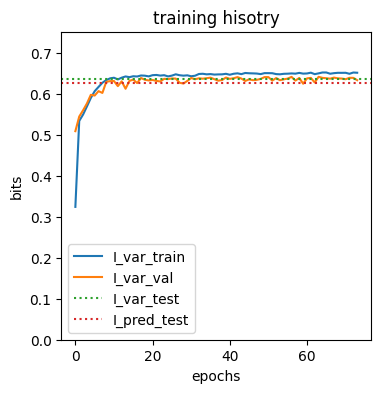

In [6]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

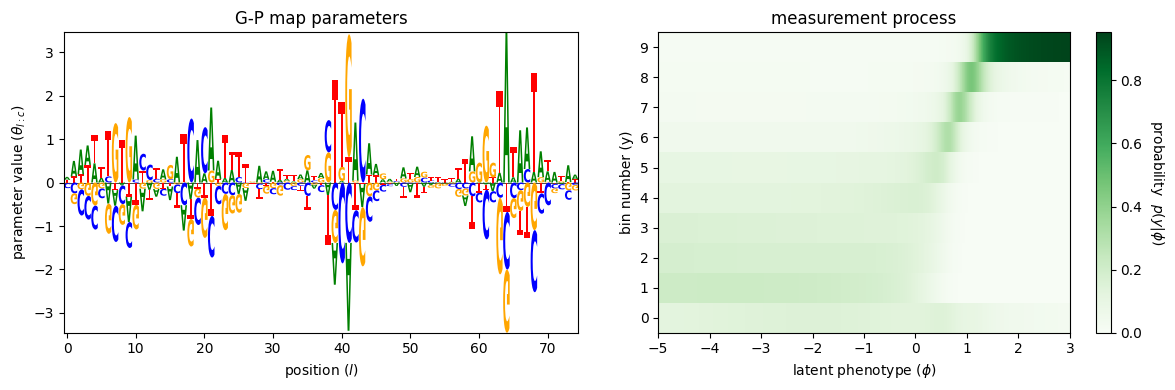

In [7]:
# Get G-P map parameters in matrix form
theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,2,figsize=[12,4])

# Left panel: draw logo using logomaker
ax = axs[0]
logo = logomaker.Logo(theta['logomaker_df'], ax=ax)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

# Right panel: draw measurement process as heatmap
ax = axs[1]
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_g-p_map_mpa_visualization.png')
plt.show()

In [8]:
# Test simulate_data
sim_df = model.simulate_dataset(template_df = data_df)
sim_df.head()

,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,-0.663740,0,0,0,1,0,0,0,0,0,0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...
1,test,0.693826,0,0,0,0,0,0,0,1,0,0,AAAAAATCTGAGTTAGCTTACTCATTAGGCACCCCAGGCTTGACAC...
2,test,0.755655,0,0,0,0,0,1,0,0,0,0,AAAAAATCTGAGTTTGCTCACTCTATCGGCACCCCAGTCTTTACAC...
3,training,1.246545,0,0,0,0,0,0,0,1,0,0,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...
4,training,0.253125,0,0,0,0,0,1,0,0,0,0,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...


In [9]:
# Separate test from data_df
ix_test = (sim_df['set']=='test')
sim_test_df = sim_df[ix_test].reset_index(drop=True)
print(f'test N: {len(sim_test_df):,}')

# Remove test data from data_df
sim_df = sim_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(sim_df):,}')
sim_df.head(10)

test N: 9,935
training + validation N: 40,583


,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,-0.663740,0,0,0,1,0,0,0,0,0,0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...
1,training,1.246545,0,0,0,0,0,0,0,1,0,0,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...
2,training,0.253125,0,0,0,0,0,1,0,0,0,0,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...
3,training,-1.234525,0,0,1,0,0,0,0,0,0,0,AAAAAATGTCAGTTAGCTGACTCATTAGGCACCCCTGGCTTTACGT...
4,validation,0.732994,0,0,0,0,0,0,0,1,0,0,AAAAAATGTGAGAAAGCTCACTCCTTTGGCACCGCAGGCTTTACAC...
5,validation,0.985180,0,0,0,0,0,0,0,0,1,0,AAAAAATGTGAGATAGGTCACTCCTAAGGCACCCCAGGCTTTACAA...
6,training,-0.451566,1,0,0,0,0,0,0,0,0,0,AAAAAATGTGAGGTAGCTCAGTCCACAGGCACCCCAGCCTTTAAAC...
7,training,0.656433,0,0,0,0,0,0,1,0,0,0,AAAAAATGTGAGTTAGCTAACTCATTAGGTACCCCAGGATTTACAC...
8,training,1.709967,0,0,0,0,0,0,0,1,0,0,AAAAAATGTGAGTTAGCTCACTCTTTAGGAATCCCAGGCTTTACAC...
9,validation,-0.958765,1,0,0,0,0,0,0,0,0,0,AAAAAATGTGAGTTAGTACATTCGTTAGGCACCCCAGTCTTTACCC...


In [10]:
# Define model
sim_model = mavenn.Model(regression_type='MPA',
                       L=L,
                       Y=Y,
                       alphabet='dna',
                       gpmap_type='additive',
                       mpa_hidden_nodes=100)

# Where is ct_n?
sim_model.set_data(x=sim_df['x'],
                   y=sim_df[y_cols])

# Fit model to data
sim_model.fit(learning_rate=.005,
              epochs=1000,
              batch_size=500,
              early_stopping=True,
              early_stopping_patience=10,
              linear_initialization=True)

N = 40,583 observations set as training data.
Using 19.8% for validation.
Data shuffled.
Time to set data: 0.34 sec.


0epoch [00:00, ?epoch/s]

 
LSMR            Least-squares solution of  Ax = b

The matrix A has 32557 rows and 300 columns
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =      300

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  9.336e+02  1.083e+06   1.0e+00  1.2e+00
     1  6.39787e-02  5.134e+02  1.633e+04   5.5e-01  2.3e-02  1.4e+03  1.0e+00
     2 -5.20087e-02  4.491e+02  4.184e+03   4.8e-01  6.7e-03  1.4e+03  2.1e+01
     3 -1.10508e-01  4.403e+02  2.164e+03   4.7e-01  3.5e-03  1.4e+03  3.0e+01
     4 -7.42014e-02  4.369e+02  8.527e+02   4.7e-01  1.4e-03  1.4e+03  3.2e+01
     5 -7.42522e-02  4.369e+02  8.491e+02   4.7e-01  1.4e-03  1.4e+03  2.9e+01
     6 -8.22602e-02  4.365e+02  3.621e+02   4.7e-01  4.2e-04  2.0e+03  2.9e+01
     7 -8.86601e-02  4.364e+02  1.571e+02   4.7e-01  1.8e-04  2.0e+03  3.5e+01
     8 -8.63867e-02  4.364e+02  6.517e+01   4.7e-01  7.6e-05  2.0e+03  3.1e+01
 

  0%|                                               | 0/1000 [00:00<?, ?epoch/s]

Epoch 1/1000
66/66 [==============================] - ETA: 0s - loss: 1163.5645 - I_var: 0.2464

  0%| | 1/1000 [00:02<42:49,  2.57s/epoch, loss=1.16e+3, I_var=0.246, val_loss=1

66/66 [==============================] - 3s 33ms/step - loss: 1163.5645 - I_var: 0.2464 - val_loss: 1053.0038 - val_I_var: 0.4730
Epoch 2/1000
66/66 [==============================] - ETA: 0s - loss: 1038.0974 - I_var: 0.4952

  0%| | 2/1000 [00:04<31:36,  1.90s/epoch, loss=1.04e+3, I_var=0.495, val_loss=1

66/66 [==============================] - 1s 22ms/step - loss: 1038.0974 - I_var: 0.4952 - val_loss: 1014.8219 - val_I_var: 0.5195
Epoch 3/1000
64/66 [============================>.] - ETA: 0s - loss: 1016.2599 - I_var: 0.5176

  0%| | 3/1000 [00:05<27:49,  1.67s/epoch, loss=1.01e+3, I_var=0.52, val_loss=99

66/66 [==============================] - 1s 21ms/step - loss: 1014.6007 - I_var: 0.5199 - val_loss: 996.4288 - val_I_var: 0.5406
Epoch 4/1000
63/66 [===========================>..] - ETA: 0s - loss: 1003.0526 - I_var: 0.5369

  0%| | 4/1000 [00:06<25:53,  1.56s/epoch, loss=1e+3, I_var=0.536, val_loss=989,

66/66 [==============================] - 1s 21ms/step - loss: 1001.5817 - I_var: 0.5363 - val_loss: 988.7801 - val_I_var: 0.5495
Epoch 5/1000
65/66 [============================>.] - ETA: 0s - loss: 994.7605 - I_var: 0.5531

  0%| | 5/1000 [00:08<26:38,  1.61s/epoch, loss=993, I_var=0.557, val_loss=976, 

66/66 [==============================] - 2s 26ms/step - loss: 993.2162 - I_var: 0.5570 - val_loss: 976.4530 - val_I_var: 0.5798
Epoch 6/1000
66/66 [==============================] - ETA: 0s - loss: 986.6118 - I_var: 0.5682

  1%| | 6/1000 [00:09<25:42,  1.55s/epoch, loss=987, I_var=0.568, val_loss=973, 

66/66 [==============================] - 1s 22ms/step - loss: 986.6118 - I_var: 0.5682 - val_loss: 973.1657 - val_I_var: 0.5869
Epoch 7/1000
64/66 [============================>.] - ETA: 0s - loss: 983.6190 - I_var: 0.5801

  1%| | 7/1000 [00:11<24:36,  1.49s/epoch, loss=982, I_var=0.578, val_loss=971, 

66/66 [==============================] - 1s 21ms/step - loss: 982.3333 - I_var: 0.5776 - val_loss: 971.3062 - val_I_var: 0.5891
Epoch 8/1000
66/66 [==============================] - ETA: 0s - loss: 977.4428 - I_var: 0.5940

  1%| | 8/1000 [00:12<23:55,  1.45s/epoch, loss=977, I_var=0.594, val_loss=967, 

66/66 [==============================] - 1s 21ms/step - loss: 977.4428 - I_var: 0.5940 - val_loss: 966.7841 - val_I_var: 0.5988
Epoch 9/1000
64/66 [============================>.] - ETA: 0s - loss: 978.1038 - I_var: 0.5923

  1%| | 9/1000 [00:14<25:12,  1.53s/epoch, loss=977, I_var=0.595, val_loss=968, 

66/66 [==============================] - 2s 26ms/step - loss: 976.5004 - I_var: 0.5946 - val_loss: 967.5450 - val_I_var: 0.5960
Epoch 10/1000
66/66 [==============================] - ETA: 0s - loss: 976.0150 - I_var: 0.5920

  1%| | 10/1000 [00:15<24:53,  1.51s/epoch, loss=976, I_var=0.592, val_loss=967,

66/66 [==============================] - 1s 22ms/step - loss: 976.0150 - I_var: 0.5920 - val_loss: 967.4915 - val_I_var: 0.5926
Epoch 11/1000
64/66 [============================>.] - ETA: 0s - loss: 976.8358 - I_var: 0.5930

  1%| | 11/1000 [00:17<23:55,  1.45s/epoch, loss=975, I_var=0.594, val_loss=970,

66/66 [==============================] - 1s 20ms/step - loss: 975.2603 - I_var: 0.5942 - val_loss: 969.6548 - val_I_var: 0.5877
Epoch 12/1000
65/66 [============================>.] - ETA: 0s - loss: 975.6793 - I_var: 0.5955

  1%| | 12/1000 [00:18<23:05,  1.40s/epoch, loss=974, I_var=0.594, val_loss=964,

66/66 [==============================] - 1s 20ms/step - loss: 974.1840 - I_var: 0.5940 - val_loss: 964.3422 - val_I_var: 0.6002
Epoch 13/1000
64/66 [============================>.] - ETA: 0s - loss: 973.9216 - I_var: 0.5996

  1%| | 13/1000 [00:19<22:52,  1.39s/epoch, loss=972, I_var=0.595, val_loss=965,

66/66 [==============================] - 1s 21ms/step - loss: 972.1901 - I_var: 0.5951 - val_loss: 965.3182 - val_I_var: 0.5955
Epoch 14/1000
64/66 [============================>.] - ETA: 0s - loss: 972.5999 - I_var: 0.6018

  1%| | 14/1000 [00:21<22:49,  1.39s/epoch, loss=971, I_var=0.599, val_loss=962,

66/66 [==============================] - 1s 21ms/step - loss: 971.3885 - I_var: 0.5991 - val_loss: 962.4147 - val_I_var: 0.6005
Epoch 15/1000
65/66 [============================>.] - ETA: 0s - loss: 972.8561 - I_var: 0.6010

  2%| | 15/1000 [00:22<22:31,  1.37s/epoch, loss=971, I_var=0.6, val_loss=964, v

66/66 [==============================] - 1s 20ms/step - loss: 971.3636 - I_var: 0.6003 - val_loss: 964.0766 - val_I_var: 0.5971
Epoch 16/1000
64/66 [============================>.] - ETA: 0s - loss: 972.7157 - I_var: 0.6006

  2%| | 16/1000 [00:23<22:11,  1.35s/epoch, loss=971, I_var=0.601, val_loss=964,

66/66 [==============================] - 1s 20ms/step - loss: 970.6206 - I_var: 0.6007 - val_loss: 964.4635 - val_I_var: 0.5950
Epoch 17/1000
65/66 [============================>.] - ETA: 0s - loss: 972.5697 - I_var: 0.6004

  2%| | 17/1000 [00:25<23:01,  1.41s/epoch, loss=971, I_var=0.605, val_loss=961,

66/66 [==============================] - 2s 23ms/step - loss: 971.0520 - I_var: 0.6050 - val_loss: 961.0140 - val_I_var: 0.6053
Epoch 18/1000
66/66 [==============================] - ETA: 0s - loss: 969.9913 - I_var: 0.5987

  2%| | 18/1000 [00:26<23:25,  1.43s/epoch, loss=970, I_var=0.599, val_loss=965,

66/66 [==============================] - 1s 23ms/step - loss: 969.9913 - I_var: 0.5987 - val_loss: 964.5153 - val_I_var: 0.5949
Epoch 19/1000
63/66 [===========================>..] - ETA: 0s - loss: 972.0466 - I_var: 0.6009

  2%| | 19/1000 [00:28<22:56,  1.40s/epoch, loss=970, I_var=0.6, val_loss=962, v

66/66 [==============================] - 1s 20ms/step - loss: 969.7835 - I_var: 0.5997 - val_loss: 962.1301 - val_I_var: 0.6012
Epoch 20/1000
65/66 [============================>.] - ETA: 0s - loss: 971.0244 - I_var: 0.6037

  2%| | 20/1000 [00:29<22:28,  1.38s/epoch, loss=970, I_var=0.6, val_loss=961, v

66/66 [==============================] - 1s 20ms/step - loss: 969.5408 - I_var: 0.6000 - val_loss: 960.8133 - val_I_var: 0.6054
Epoch 21/1000
65/66 [============================>.] - ETA: 0s - loss: 970.8798 - I_var: 0.6034

  2%| | 21/1000 [00:30<22:05,  1.35s/epoch, loss=969, I_var=0.608, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 969.3627 - I_var: 0.6076 - val_loss: 960.9848 - val_I_var: 0.6027
Epoch 22/1000
63/66 [===========================>..] - ETA: 0s - loss: 969.9384 - I_var: 0.6062

  2%| | 22/1000 [00:32<21:59,  1.35s/epoch, loss=969, I_var=0.605, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 968.8292 - I_var: 0.6054 - val_loss: 961.2039 - val_I_var: 0.6004
Epoch 23/1000
64/66 [============================>.] - ETA: 0s - loss: 969.7511 - I_var: 0.6058

  2%| | 23/1000 [00:33<21:53,  1.34s/epoch, loss=968, I_var=0.604, val_loss=960,

66/66 [==============================] - 1s 20ms/step - loss: 968.4480 - I_var: 0.6043 - val_loss: 960.4454 - val_I_var: 0.6037
Epoch 24/1000
64/66 [============================>.] - ETA: 0s - loss: 969.8564 - I_var: 0.6058

  2%| | 24/1000 [00:34<21:40,  1.33s/epoch, loss=968, I_var=0.603, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 968.3663 - I_var: 0.6027 - val_loss: 961.3397 - val_I_var: 0.5994
Epoch 25/1000
65/66 [============================>.] - ETA: 0s - loss: 969.9802 - I_var: 0.6049

  2%| | 25/1000 [00:36<21:36,  1.33s/epoch, loss=968, I_var=0.607, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 968.4708 - I_var: 0.6070 - val_loss: 960.5185 - val_I_var: 0.6035
Epoch 26/1000
64/66 [============================>.] - ETA: 0s - loss: 970.5894 - I_var: 0.6025

  3%| | 26/1000 [00:37<21:31,  1.33s/epoch, loss=969, I_var=0.604, val_loss=960,

66/66 [==============================] - 1s 20ms/step - loss: 969.2278 - I_var: 0.6036 - val_loss: 960.0590 - val_I_var: 0.6048
Epoch 27/1000
65/66 [============================>.] - ETA: 0s - loss: 970.7849 - I_var: 0.6020

  3%| | 27/1000 [00:38<22:10,  1.37s/epoch, loss=969, I_var=0.603, val_loss=962,

66/66 [==============================] - 1s 22ms/step - loss: 969.2819 - I_var: 0.6030 - val_loss: 961.7458 - val_I_var: 0.5990
Epoch 28/1000
64/66 [============================>.] - ETA: 0s - loss: 969.4643 - I_var: 0.6055

  3%| | 28/1000 [00:40<21:52,  1.35s/epoch, loss=968, I_var=0.603, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 968.2989 - I_var: 0.6027 - val_loss: 960.7667 - val_I_var: 0.5999
Epoch 29/1000
65/66 [============================>.] - ETA: 0s - loss: 969.8447 - I_var: 0.6039

  3%| | 29/1000 [00:41<21:50,  1.35s/epoch, loss=968, I_var=0.604, val_loss=967,

66/66 [==============================] - 1s 20ms/step - loss: 968.3557 - I_var: 0.6043 - val_loss: 967.2907 - val_I_var: 0.5836
Epoch 30/1000
65/66 [============================>.] - ETA: 0s - loss: 971.2721 - I_var: 0.5996

  3%| | 30/1000 [00:42<21:33,  1.33s/epoch, loss=970, I_var=0.599, val_loss=959,

66/66 [==============================] - 1s 20ms/step - loss: 969.7895 - I_var: 0.5989 - val_loss: 959.0607 - val_I_var: 0.6059
Epoch 31/1000
66/66 [==============================] - ETA: 0s - loss: 967.6023 - I_var: 0.6056

  3%| | 31/1000 [00:44<21:28,  1.33s/epoch, loss=968, I_var=0.606, val_loss=961,

66/66 [==============================] - 1s 20ms/step - loss: 967.6023 - I_var: 0.6056 - val_loss: 960.9600 - val_I_var: 0.6018
Epoch 32/1000
65/66 [============================>.] - ETA: 0s - loss: 969.2543 - I_var: 0.6053

  3%| | 32/1000 [00:45<22:23,  1.39s/epoch, loss=968, I_var=0.607, val_loss=964,

66/66 [==============================] - 2s 23ms/step - loss: 967.7545 - I_var: 0.6068 - val_loss: 963.9050 - val_I_var: 0.5915
Epoch 33/1000
64/66 [============================>.] - ETA: 0s - loss: 969.5391 - I_var: 0.6040

  3%| | 33/1000 [00:47<22:25,  1.39s/epoch, loss=968, I_var=0.602, val_loss=961,

66/66 [==============================] - 1s 21ms/step - loss: 968.0225 - I_var: 0.6024 - val_loss: 961.3279 - val_I_var: 0.5996
Epoch 34/1000
64/66 [============================>.] - ETA: 0s - loss: 968.4786 - I_var: 0.6069

  3%| | 34/1000 [00:48<22:32,  1.40s/epoch, loss=967, I_var=0.605, val_loss=960,

66/66 [==============================] - 1s 22ms/step - loss: 967.1687 - I_var: 0.6050 - val_loss: 960.0636 - val_I_var: 0.6019
Epoch 35/1000
64/66 [============================>.] - ETA: 0s - loss: 969.0196 - I_var: 0.6060

  4%| | 35/1000 [00:50<23:16,  1.45s/epoch, loss=967, I_var=0.605, val_loss=960,

66/66 [==============================] - 2s 24ms/step - loss: 967.4972 - I_var: 0.6046 - val_loss: 960.1434 - val_I_var: 0.6014
Epoch 36/1000
65/66 [============================>.] - ETA: 0s - loss: 968.3433 - I_var: 0.6073

  4%| | 36/1000 [00:51<23:21,  1.45s/epoch, loss=967, I_var=0.607, val_loss=960,

66/66 [==============================] - 1s 22ms/step - loss: 966.8511 - I_var: 0.6074 - val_loss: 959.5369 - val_I_var: 0.6031
Epoch 37/1000
66/66 [==============================] - ETA: 0s - loss: 967.1997 - I_var: 0.6073

  4%| | 37/1000 [00:53<24:08,  1.50s/epoch, loss=967, I_var=0.607, val_loss=959,

66/66 [==============================] - 2s 25ms/step - loss: 967.1997 - I_var: 0.6073 - val_loss: 959.2098 - val_I_var: 0.6041
Epoch 38/1000
66/66 [==============================] - ETA: 0s - loss: 967.4679 - I_var: 0.6014

  4%| | 38/1000 [00:54<24:47,  1.55s/epoch, loss=967, I_var=0.601, val_loss=959,

66/66 [==============================] - 2s 25ms/step - loss: 967.4679 - I_var: 0.6014 - val_loss: 958.7186 - val_I_var: 0.6052
Epoch 39/1000
64/66 [============================>.] - ETA: 0s - loss: 968.3541 - I_var: 0.6069

  4%| | 39/1000 [00:56<23:59,  1.50s/epoch, loss=967, I_var=0.605, val_loss=958,

66/66 [==============================] - 1s 21ms/step - loss: 966.8833 - I_var: 0.6048 - val_loss: 958.2938 - val_I_var: 0.6078
Epoch 40/1000
63/66 [===========================>..] - ETA: 0s - loss: 969.4816 - I_var: 0.6034

  4%| | 40/1000 [00:57<23:31,  1.47s/epoch, loss=968, I_var=0.607, val_loss=959,

66/66 [==============================] - 1s 21ms/step - loss: 967.7258 - I_var: 0.6067 - val_loss: 959.1647 - val_I_var: 0.6023
Epoch 41/1000
65/66 [============================>.] - ETA: 0s - loss: 968.3552 - I_var: 0.6067

  4%| | 41/1000 [00:58<22:55,  1.43s/epoch, loss=967, I_var=0.609, val_loss=959,

66/66 [==============================] - 1s 21ms/step - loss: 966.8524 - I_var: 0.6090 - val_loss: 958.5684 - val_I_var: 0.6051
Epoch 42/1000
66/66 [==============================] - ETA: 0s - loss: 966.7874 - I_var: 0.6063

  4%| | 42/1000 [01:00<23:04,  1.45s/epoch, loss=967, I_var=0.606, val_loss=959,

66/66 [==============================] - 1s 22ms/step - loss: 966.7874 - I_var: 0.6063 - val_loss: 958.8860 - val_I_var: 0.6047
Epoch 43/1000
66/66 [==============================] - ETA: 0s - loss: 966.6383 - I_var: 0.6066

  4%| | 43/1000 [01:02<24:30,  1.54s/epoch, loss=967, I_var=0.607, val_loss=958,

66/66 [==============================] - 2s 27ms/step - loss: 966.6383 - I_var: 0.6066 - val_loss: 958.2172 - val_I_var: 0.6063
Epoch 44/1000
64/66 [============================>.] - ETA: 0s - loss: 968.8095 - I_var: 0.6051

  4%| | 44/1000 [01:03<24:10,  1.52s/epoch, loss=967, I_var=0.609, val_loss=958,

66/66 [==============================] - 1s 22ms/step - loss: 966.9251 - I_var: 0.6089 - val_loss: 958.4169 - val_I_var: 0.6051
Epoch 45/1000
66/66 [==============================] - ETA: 0s - loss: 966.5802 - I_var: 0.6071

  4%| | 45/1000 [01:05<23:50,  1.50s/epoch, loss=967, I_var=0.607, val_loss=959,

66/66 [==============================] - 1s 22ms/step - loss: 966.5802 - I_var: 0.6071 - val_loss: 958.8203 - val_I_var: 0.6057
Epoch 46/1000
64/66 [============================>.] - ETA: 0s - loss: 967.7484 - I_var: 0.6077

  5%| | 46/1000 [01:06<24:20,  1.53s/epoch, loss=966, I_var=0.608, val_loss=959,

66/66 [==============================] - 2s 24ms/step - loss: 966.3820 - I_var: 0.6078 - val_loss: 958.7661 - val_I_var: 0.6054
Epoch 47/1000
65/66 [============================>.] - ETA: 0s - loss: 967.9456 - I_var: 0.6075

  5%| | 47/1000 [01:08<24:23,  1.54s/epoch, loss=966, I_var=0.609, val_loss=959,

66/66 [==============================] - 2s 24ms/step - loss: 966.4389 - I_var: 0.6093 - val_loss: 959.2692 - val_I_var: 0.6021
Epoch 48/1000
66/66 [==============================] - ETA: 0s - loss: 966.3389 - I_var: 0.6077

  5%| | 48/1000 [01:09<24:51,  1.57s/epoch, loss=966, I_var=0.608, val_loss=959,

66/66 [==============================] - 2s 25ms/step - loss: 966.3389 - I_var: 0.6077 - val_loss: 959.4073 - val_I_var: 0.6023
Epoch 49/1000
66/66 [==============================] - ETA: 0s - loss: 966.8755 - I_var: 0.6117

  5%| | 49/1000 [01:11<25:36,  1.62s/epoch, loss=967, I_var=0.612, val_loss=959,

66/66 [==============================] - 2s 26ms/step - loss: 966.8755 - I_var: 0.6117 - val_loss: 958.8775 - val_I_var: 0.6057
Epoch 50/1000
64/66 [============================>.] - ETA: 0s - loss: 968.8755 - I_var: 0.6043

  5%| | 50/1000 [01:13<25:06,  1.59s/epoch, loss=967, I_var=0.607, val_loss=962,

66/66 [==============================] - 2s 23ms/step - loss: 967.3333 - I_var: 0.6066 - val_loss: 961.9354 - val_I_var: 0.5948
Epoch 51/1000
64/66 [============================>.] - ETA: 0s - loss: 970.4107 - I_var: 0.6006

  5%| | 51/1000 [01:14<24:38,  1.56s/epoch, loss=969, I_var=0.6, val_loss=960, v

66/66 [==============================] - 1s 23ms/step - loss: 968.7690 - I_var: 0.6003 - val_loss: 959.8442 - val_I_var: 0.6000
Epoch 52/1000
64/66 [============================>.] - ETA: 0s - loss: 968.5646 - I_var: 0.6052

  5%| | 52/1000 [01:16<24:31,  1.55s/epoch, loss=967, I_var=0.604, val_loss=960,

66/66 [==============================] - 2s 23ms/step - loss: 966.8613 - I_var: 0.6040 - val_loss: 960.2595 - val_I_var: 0.6001
Epoch 53/1000
66/66 [==============================] - ETA: 0s - loss: 966.7769 - I_var: 0.6030

  5%| | 53/1000 [01:17<25:23,  1.61s/epoch, loss=967, I_var=0.603, val_loss=959,

66/66 [==============================] - 2s 26ms/step - loss: 966.7769 - I_var: 0.6030 - val_loss: 958.8680 - val_I_var: 0.6041


  5%| | 53/1000 [01:17<23:11,  1.47s/epoch, loss=967, I_var=0.603, val_loss=959,

Training time: 78.3 seconds


On test data:
I_intr_like: 0.616 +- 0.011 bits
I_intr_pred: 0.616 +- 0.013 bits
I_var_test: 0.603 +- 0.011 bits
I_pred_test: 0.611 +- 0.016 bits


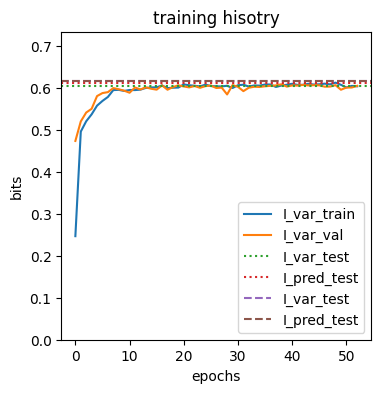

In [11]:
# Show training history
print('On test data:')
x_test = sim_test_df['x'].values
y_test = sim_test_df[y_cols].values

# Compute the intrinsic information using the true model
I_intr_like, dI_intr_like =  model.I_variational(x=x_test, y=y_test)
print(f'I_intr_like: {I_intr_like:.3f} +- {dI_intr_like:.3f} bits') 

I_intr_pred, dI_intr_pred =  model.I_predictive(x=x_test, y=y_test)
print(f'I_intr_pred: {I_intr_pred:.3f} +- {dI_intr_pred:.3f} bits') 

# Compute likelihood information
I_var, dI_var =  sim_model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = sim_model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = sim_model.history['I_var']
val_I_var_hist = sim_model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.axhline(I_intr_like, color='C4', linestyle='--', label='I_var_test')
ax.axhline(I_intr_pred, color='C5', linestyle='--', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);